In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_big=pd.read_csv('insurance.csv')

In [3]:
df_big.shape

(1338, 7)

In [4]:
df= df_big.sample(n=1000, random_state=42)

In [5]:
df.shape

(1000, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
349,19,male,27.835,0,no,northwest,1635.73365
1156,19,male,44.880,0,yes,southeast,39722.74620
991,38,female,27.835,2,no,northeast,7144.86265
876,49,female,27.100,1,no,southwest,26140.36030
773,19,female,28.880,0,yes,northwest,17748.50620


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 764 to 773
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 62.5+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.330000,30.787830,1.109000,13424.151897
std,13.957647,6.201213,1.193542,12157.933538
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4815.829287
50%,39.000000,30.495000,1.000000,9440.087825
75%,51.000000,34.816250,2.000000,17178.892300
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [15]:
df['age'] = df['age'].astype(float)
df['age'].head()

764     45.0
887     36.0
890     64.0
1293    46.0
259     19.0
Name: age, dtype: float64

In [16]:
df['children']=df['children'].astype('float')
df['children'].head()

764     2.0
887     0.0
890     0.0
1293    3.0
259     0.0
Name: children, dtype: float64

In [17]:
df['Gender_Male']=pd.get_dummies(df['sex'],drop_first=True)

In [18]:
df.drop(columns='sex',axis=1,inplace=True)

In [19]:
df['Smoker_Yes']=pd.get_dummies(df['smoker'],drop_first=True)

In [20]:
df.drop(columns='smoker',inplace=True)

In [21]:
df1=pd.get_dummies(df,columns=['region'])

In [22]:
df1

,age,bmi,children,charges,Gender_Male,Smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45.0,25.175,2.0,9095.06825,False,False,True,False,False,False
887,36.0,30.020,0.0,5272.17580,False,False,False,True,False,False
890,64.0,26.885,0.0,29330.98315,False,True,False,True,False,False
1293,46.0,25.745,3.0,9301.89355,True,False,False,True,False,False
259,19.0,31.920,0.0,33750.29180,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
349,19.0,27.835,0.0,1635.73365,True,False,False,True,False,False
1156,19.0,44.880,0.0,39722.74620,True,True,False,False,True,False
991,38.0,27.835,2.0,7144.86265,False,False,True,False,False,False
876,49.0,27.100,1.0,26140.36030,False,False,False,False,False,True


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 764 to 773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   float64
 1   bmi               1000 non-null   float64
 2   children          1000 non-null   float64
 3   charges           1000 non-null   float64
 4   Gender_Male       1000 non-null   bool   
 5   Smoker_Yes        1000 non-null   bool   
 6   region_northeast  1000 non-null   bool   
 7   region_northwest  1000 non-null   bool   
 8   region_southeast  1000 non-null   bool   
 9   region_southwest  1000 non-null   bool   
dtypes: bool(6), float64(4)
memory usage: 44.9 KB


In [24]:
df1['Gender_Male']=df1['Gender_Male'].astype('int')
df1['Smoker_Yes']=df1['Smoker_Yes'].astype('int')
df1['region_northwest']=df1['region_northwest'].astype('int64')
df1['region_southeast']=df1['region_southeast'].astype('int64')
df1['region_southwest']=df1['region_southwest'].astype('int64')
df1['region_northeast']=df1['region_northeast'].astype('int64')

In [25]:
df1.head()

,age,bmi,children,charges,Gender_Male,Smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45.0,25.175,2.0,9095.06825,0,0,1,0,0,0
887,36.0,30.020,0.0,5272.17580,0,0,0,1,0,0
890,64.0,26.885,0.0,29330.98315,0,1,0,1,0,0
1293,46.0,25.745,3.0,9301.89355,1,0,0,1,0,0
259,19.0,31.920,0.0,33750.29180,1,1,0,1,0,0


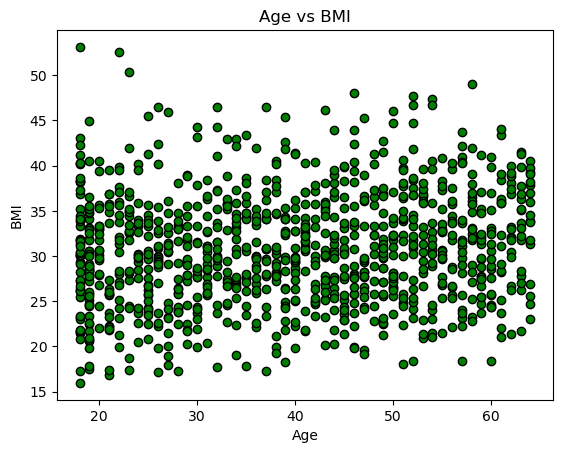

In [26]:
plt.scatter(df1['age'], df1['bmi'], color='green',edgecolors='black')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")
plt.show()

<Axes: xlabel='charges', ylabel='Density'>

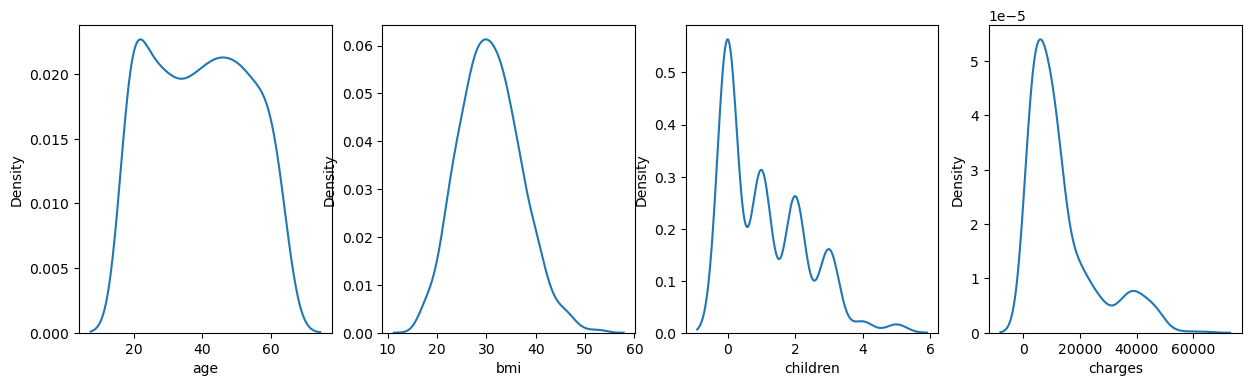

In [27]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.kdeplot(df1['age'])
plt.subplot(1,4,2)
sns.kdeplot(df1['bmi'])
plt.subplot(1,4,3)
sns.kdeplot(df1['children'])
plt.subplot(1,4,4)
sns.kdeplot(df1['charges'])

In [28]:
df1.skew()

age                 0.053596
bmi                 0.303272
children            0.865021
charges             1.470003
Gender_Male        -0.024038
Smoker_Yes          1.404064
region_northeast    1.325978
region_northwest    1.181307
region_southeast    1.003706
region_southwest    1.131960
dtype: float64

<Axes: xlabel='charges', ylabel='Density'>

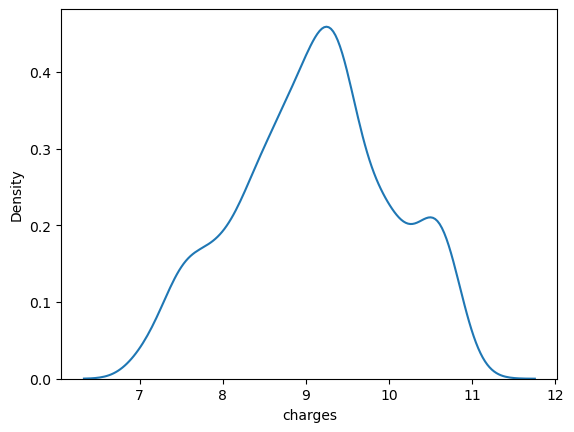

In [29]:
df1['charges']=np.log(df['charges'])
sns.kdeplot(df1['charges'])

In [30]:
df1['charges'].skew()

-0.10203610871798845

<Axes: xlabel='children', ylabel='Density'>

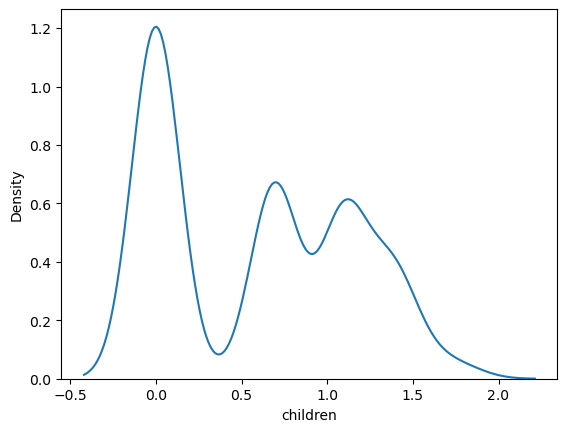

In [31]:
df1['children']=np.log1p(df['children'])
sns.kdeplot(df1['children'])

In [32]:
df1['children'].skew()

0.21493926876406894

In [33]:
df1.corr() #charges --smoker,age,bmi,children

,age,bmi,children,charges,Gender_Male,Smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.121509,0.039921,0.522849,-0.048744,-0.032265,-0.015632,0.007127,-0.017171,0.025554
bmi,0.121509,1.000000,0.004633,0.123343,0.059054,-0.005362,-0.119827,-0.142827,0.260306,-0.011234
children,0.039921,0.004633,1.000000,0.157476,0.035107,-0.011807,-0.027218,0.044271,-0.044377,0.027839
charges,0.522849,0.123343,0.157476,1.000000,-0.001196,0.670941,0.029392,-0.010756,0.018750,-0.036764
Gender_Male,-0.048744,0.059054,0.035107,-0.001196,1.000000,0.084133,-0.011245,-0.025431,0.028386,0.006782
Smoker_Yes,-0.032265,-0.005362,-0.011807,0.670941,0.084133,1.000000,-0.010029,-0.030613,0.083116,-0.045460
region_northeast,-0.015632,-0.119827,-0.027218,0.029392,-0.011245,-0.010029,1.000000,-0.306885,-0.331725,-0.313502
region_northwest,0.007127,-0.142827,0.044271,-0.010756,-0.025431,-0.030613,-0.306885,1.000000,-0.352669,-0.333295
region_southeast,-0.017171,0.260306,-0.044377,0.018750,0.028386,0.083116,-0.331725,-0.352669,1.000000,-0.360274
region_southwest,0.025554,-0.011234,0.027839,-0.036764,0.006782,-0.045460,-0.313502,-0.333295,-0.360274,1.000000


<Axes: >

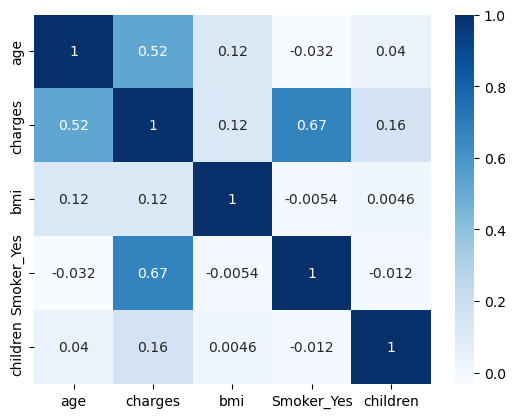

In [34]:
sns.heatmap(df1[['age', 'charges', 'bmi','Smoker_Yes','children']].corr(),annot=True,cmap='Blues')

In [35]:
df1.columns

Index(['age', 'bmi', 'children', 'charges', 'Gender_Male', 'Smoker_Yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error
from sklearn.model_selection import train_test_split
X=df1.drop(columns=['region_northeast','region_northwest','region_southwest','region_southeast','charges'])
y=df1['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
print("Best Slope :",model.coef_[0])
print("Intercept:",model.intercept_)
y_pred=model.predict(X_test)
print("R2 score:",r2_score(y_pred,y_test))
print("RMSE:",root_mean_squared_error(y_pred,y_test))

Best Slope : 0.035510250004454735
Intercept: 7.049280102961571
R2 score: 0.5705759551267864
RMSE: 0.47892265610093837


In [37]:
import pickle

filename = 'trained_model.sav'
with open(filename, 'wb') as f:
    pickle.dump((model), f)

with open(filename, 'rb') as f:
    loaded_model= pickle.load(f)
